# Census Income Example
This is a Keras example of classification problem. To simplify the data preparation part I used the Census problem from the Sci-Kit Learn class.

The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

# Install tensorflow
If necessary uncomment one of the lines below

In [ ]:
# For tensorflow with CPU support only
#!pip install tensorflow
# For GPU version of tensorflow
#!pip install tensorflow-gpu

# Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [ ]:
df = pd.read_csv("https://github.com/PrzemekSekula/DeepLearningClasses1/raw/master/data/census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Data preparation
### Selecting columns
Personaly I decided to delete the following columns:
- education - we have education-num, this is enough
- marital status - too many classes
- relationship - I am not sure if it is useful, and there are many classes
- race - I am not sure if it is useful
- native-country - too many classes

**I deleted many columns just to make the task easier to read. Students are encouraged to experiment with the columns and check if they can improve the results.**


In [ ]:
df = df[['age', 'workclass', 'education-num', 'occupation', 
         'sex', 'hours-per-week', 'income']]

df.head()

,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Male,40,<=50K
4,28,Private,13,Prof-specialty,Female,40,<=50K


### Data preprocessing

#### First step - change the labels into binary values.

In [ ]:
df.income = (df.income == '>50K').astype(int)
print (df.income.value_counts())
df.head()

0    24720
1     7841
Name: income, dtype: int64


,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,0
2,38,Private,9,Handlers-cleaners,Male,40,0
3,53,Private,7,Handlers-cleaners,Male,40,0
4,28,Private,13,Prof-specialty,Female,40,0


#### Second step - change the `sex` column into binary values

In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()

,age,workclass,education-num,occupation,hours-per-week,income,sex_Male
0,39,State-gov,13,Adm-clerical,40,0,1
1,50,Self-emp-not-inc,13,Exec-managerial,13,0,1
2,38,Private,9,Handlers-cleaners,40,0,1
3,53,Private,7,Handlers-cleaners,40,0,1
4,28,Private,13,Prof-specialty,40,0,0


#### Third step - replace rare classes

Let's check if we have any rare classes

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Then we should replace rare classes for one-hot encoded columns

In [ ]:
df.loc[df.workclass.isin(['Without-pay', 'Never-worked']), 'workclass'] = '?'
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

In [ ]:
df.loc[df.occupation.isin(['Protective-serv', 'Priv-house-serv', 'Armed-Forces']), 'occupation'] = '?'
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
?                    2650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Name: occupation, dtype: int64

#### Final step - one hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'occupation'])
print (df.shape)
print (df.columns)
df.head()

(32561, 24)
Index(['age', 'education-num', 'hours-per-week', 'income', 'sex_Male',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')


,age,education-num,hours-per-week,income,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Splitting dataset

Let's split the dataset into features and labels first.
- `income` is the label (`y`)
- all other columns are features (`X`)

In [ ]:
y = df.income
X = df.drop(['income'], axis=1)

### Train test split
#### NOTE: This time we want to split the data into 3 datasets
Split ratio: 60, 20, 20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    stratify = y, random_state=1)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, 
                                                    stratify = y_test, random_state=1)

print ('X train shape:', X_train.shape)
print ('y train shape:', y_train.shape)

print ('X valid shape:', X_valid.shape)
print ('y valid shape:', y_valid.shape)

print ('X test shape:', X_test.shape)
print ('y test shape:', y_test.shape)

X train shape: (19536, 23)
y train shape: (19536,)
X valid shape: (6512, 23)
y valid shape: (6512,)
X test shape: (6513, 23)
y test shape: (6513,)


# Keras

Import modules

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras import optimizers 

## Building model

Let's define the hyperparameters first

In [ ]:
CELLS_1 = 32
CELLS_2 = 8

LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128 

NR_INPUTS = X_train.shape[1] 

print("X_train dataset contains {} features (columns).".format(NR_INPUTS))

X_train dataset contains 23 features (columns).


Now we may build the model

In [ ]:
model = Sequential() 

model.add(Dense(CELLS_1, input_shape = [NR_INPUTS, ], activation = 'relu'))
model.add(Dense(CELLS_2, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(lr=LEARNING_RATE)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics=['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/10
153/153 [==============================] - 0s 3ms/step - loss: 2.9131 - accuracy: 0.6181 - val_loss: 0.5176 - val_accuracy: 0.7641
Epoch 2/10
153/153 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7665 - val_loss: 0.4847 - val_accuracy: 0.7764
Epoch 3/10
153/153 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7782 - val_loss: 0.4637 - val_accuracy: 0.7859
Epoch 4/10
153/153 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7857 - val_loss: 0.4518 - val_accuracy: 0.7870
Epoch 5/10
153/153 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7903 - val_loss: 0.4459 - val_accuracy: 0.7944
Epoch 6/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7928 - val_loss: 0.4353 - val_accuracy: 0.7979
Epoch 7/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7975 - val_loss: 0.4296 - val_accuracy: 0.8002
Epoch 

Let's display the training history

In [ ]:
def plot_train_valid_history(history):
    """
    Plots train and validation losses.
    Arguments: history - history of training (result of keras model.fit).
        history.history must be a dictionary that looks as follow:
        {
            'loss' : .....
            'valid_loss' : .....
            'acc' : .... # Optional
            'val_acc' : ..... # Optional
        }
    """
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(8, 4))
    if 'accuracy' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)        
        
        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['accuracy'], c='b', label='Train acc')
        ax1.plot(epochs, history.history['val_accuracy'], c='g', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)        
         
        
    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)
    plt.show()

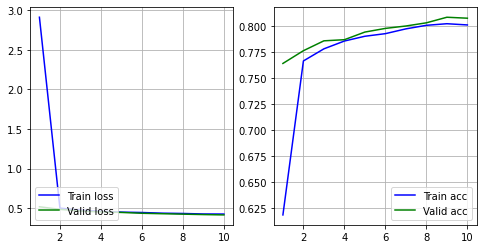

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)

print("Test score: ", score)
print("Test accuracy: ",acc)

204/204 [==============================] - 0s 869us/step - loss: 0.4163 - accuracy: 0.8095
Test score:  0.41625434160232544
Test accuracy:  0.8094580173492432


## Task 1
Create, train and test a model with following parameters:
- First hidden layer: 32 neurons, relu activation
- Dropout after first hidden layer keep_probability = 0.5
- Second hidden layer: 32 neurons, relu activation
- Output layer: 1 neuron, sigmoid activation

Training parameters:
- Learning Rate: 0.0003
- Number of Epochs: 50
- Batch size: 128

*Note: You will need your model in task 2, so it is a good idea to write a function, which creates the model.*

![alt text](./img/model_keras_task1.png "Task 1 model")

In [ ]:
# HYPERPARAMETERS

CELLS_1 = 32
CELLS_2 = 32

LEARNING_RATE = 0.0003
EPOCHS = 50
BATCH_SIZE = 128 
NR_INPUTS = X_train.shape[1] 

print("X_train dataset contains {} features (columns).".format(NR_INPUTS))

X_train dataset contains 23 features (columns).


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(CELLS_1, input_shape = [NR_INPUTS, ], activation = 'relu'))
    model.add(Dropout(0.5)) #regularyzacja po 1. warstwie, zeby uniknac overfittingu, prawdopodobienstwo utrzymania neuronow
    model.add(Dense(CELLS_2, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model    

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                768       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/50
153/153 [==============================] - 0s 3ms/step - loss: 1.0060 - accuracy: 0.6501 - val_loss: 0.5869 - val_accuracy: 0.7566
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6881 - val_loss: 0.5833 - val_accuracy: 0.7586
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7227 - val_loss: 0.5746 - val_accuracy: 0.7592
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7416 - val_loss: 0.5682 - val_accuracy: 0.7592
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7504 - val_loss: 0.5593 - val_accuracy: 0.7592
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7561 - val_loss: 0.5547 - val_accuracy: 0.7592
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7583 - val_loss: 0.5482 - val_accuracy: 0.7592
Epoch 

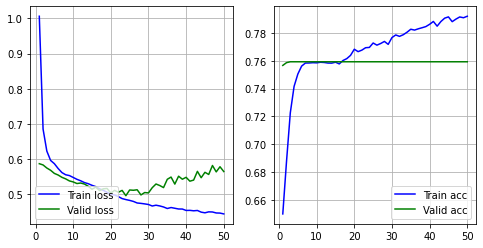

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)

In [ ]:
print("Test score: ", score)
print("Test accuracy: ",acc)

204/204 [==============================] - 0s 886us/step - loss: 0.5642 - accuracy: 0.7591
Test score:  0.5641685724258423
Test accuracy:  0.7590972185134888


## Question 1
- How does the model behave. Can you see any overfitting or undergitting problems?
- How you can prevent these problems?

## Task 2
Normalize your features. Use StandardScaler from sklearn.preprocessing library. Then train your model on the normalized features. Did it change anything with the behaviour of the model?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train the model
model = create_model()

history = model.fit(X_train, y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7255 - val_loss: 0.5026 - val_accuracy: 0.7701
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7650 - val_loss: 0.4592 - val_accuracy: 0.7978
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7727 - val_loss: 0.4388 - val_accuracy: 0.8107
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7795 - val_loss: 0.4257 - val_accuracy: 0.8153
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7866 - val_loss: 0.4183 - val_accuracy: 0.8188
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7903 - val_loss: 0.4138 - val_accuracy: 0.8180
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7917 - val_loss: 0.4126 - val_accuracy: 0.8182
Epoch 

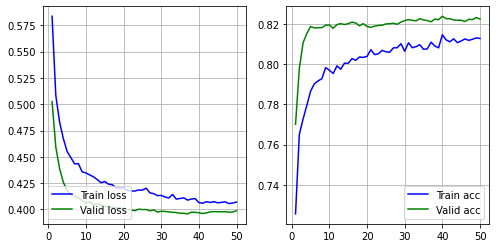

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)

print("Test score: ", score)
print("Test accuracy: ",acc)

204/204 [==============================] - 0s 803us/step - loss: 0.4038 - accuracy: 0.8181
Test score:  0.40378549695014954
Test accuracy:  0.8180561661720276
